<a href="https://colab.research.google.com/github/gabbosanti/machine-learning-lab/blob/main/slides/lab-01-dataunderstanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Python libraries for data analysis

**Relational data** are usually collected in **tabular** format (e.g., csv files)

- Each row is an **observation** (instance or tuple)
    - An object of the analysis
    - E.g., a product for market basket analysis
- Each column is an **attribute** (or feature) characterizing each object
    - All values within a column have the same type (i.e., all values belong to the same attribute domain)
    - E.g., the attributes `ID` (int), `ProductName` (str), or `Price` (float)
    
We need proper tools (e.g., libraries) to manage such data

# The library ecosystem

![Library ecosystem](https://github.com/w4bo/img-dump/assets/18005592/72869b67-6a16-4a5a-a8a4-8d8e10c2633d)

# Introduction to Pandas

**Pandas** is the shorthand for 'Python and Data Analysis'

- It provides a rich set of features for exploring and manipulating *(multidimensional) tabular data*
- [https://pandas.pydata.org/](https://pandas.pydata.org/)

pandas (Python) is a solution for the manipulation of relational data

- Two main data types: *Series* (e.g., temporal series) and *DataFrame* (e.g., table)
- Support to SQL-like operations (join/merge, aggregation, etc.)
- Data transformation: imputation of missing values, manipulation of data shape, et.


In [3]:
import pandas as pd  # By convention, the package pandas is imported as `pd`
print(pd.__version__)

2.2.2


# ... plus we will use other libraries

- NumPy: [https://numpy.org/](https://numpy.org/)
- Seaborn: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)
- Matplotlib: [https://matplotlib.org/](https://matplotlib.org/)

In [4]:
import numpy as np  # operations on arrays
import seaborn as sns  # plots
import matplotlib.pyplot as plt  # plots

## [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

- Two-dimensional, size-mutable, potentially heterogeneous tabular data.
- The primary pandas data structure.
- Data structure also contains labeled axes (rows and columns).
- Arithmetic operations align on both row and column labels.
- Can be thought of as a dict-like container for Series objects.

In [5]:
# create a numeric dataframe/table
df = pd.DataFrame([[i + j for i in range(10)] for j in range(5)],
                  index=[i for i in range(5)],
                  columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0,1,2,3,4,5,6,7,8,9
1,1,2,3,4,5,6,7,8,9,10
2,2,3,4,5,6,7,8,9,10,11
3,3,4,5,6,7,8,9,10,11,12
4,4,5,6,7,8,9,10,11,12,13


## Some operations

In [6]:
# Get the headers (i.e., the column names)
df.columns
# Get just the first two rows
df.head(2)
# Get just the last two rows
df.tail(2)
# Sort the dataframe by columns
df.sort_values(by=['a', 'b'], ascending=[False, True])

,a,b,c,d,e,f,g,h,i,j
4,4,5,6,7,8,9,10,11,12,13
3,3,4,5,6,7,8,9,10,11,12
2,2,3,4,5,6,7,8,9,10,11
1,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9


## [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

A sequence of values with the same type

- Each value is associate with a label
- Supported values and label types are the ones from NumPy (float64, int64, etc.)
- In other words, a series is a mono-dimensional vector of elements

The index of a series is the sequence of labels

- Label are usually numeric or string identifiers (e.g., the primary key of a database table)
- Labels need not be unique but must be a hashable type (both integer- and label-based indexing)

In [8]:
pd.Series([1, 2, 3], index=["a", "b", "c"])

,0
a,1
b,2
c,3


In [7]:
# Select a column (i.e., a series) as in a SQL projection
df['a']

,a
0,0
1,1
2,2
3,3
4,4


# Doing some element-wise operations

Operations between Series (e.g., +, -, /) align values based on their associated index values

In [9]:
# Add another column to the dataframe
df['k'] = df['a'] * df['b']
df

,a,b,c,d,e,f,g,h,i,j,k
0,0,1,2,3,4,5,6,7,8,9,0
1,1,2,3,4,5,6,7,8,9,10,2
2,2,3,4,5,6,7,8,9,10,11,6
3,3,4,5,6,7,8,9,10,11,12,12
4,4,5,6,7,8,9,10,11,12,13,20


In [10]:
ser_a = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser_b = pd.Series([1, 2, 3], index=["b", "a", "c"])
ser_a + ser_b  # +, -, /, *

,0
a,3
b,3
c,6


# Filtering the data

In [15]:
df[df['a'] > 2]  #prima seleziona le righe maggiori di 2 rispetto alla colonna a, poi filtra tutto il dataframe

,a,b,c,d,e,f,g,h,i,j,k
3,3,4,5,6,7,8,9,10,11,12,12
4,4,5,6,7,8,9,10,11,12,13,20


In [16]:
df[df['a'] > 2]['a']  # stessa cosa di prima, ma filtra solo rispetto alla colonna a

,a
3,3
4,4


# Doing some aggregation

In [20]:
ser_c = df["a"]# estrae la colonna a dal dataframe
ser_c.count()  # count the values => 5
ser_c.sum()    # sum the values => 10
ser_c.mean()   # average the values => 2.0
ser_c.max()    # maximum value => 4
ser_c.min()    # minimum value => 0
ser_c.idxmax() # index of the maximum value => 4

np.int64(4)

In [22]:
df.groupby(['a']).agg(['mean', 'count'])

b          c          d          e          f           g           h  \
  mean count mean count mean count mean count mean count  mean count  mean   
a                                                                            
0  1.0     1  2.0     1  3.0     1  4.0     1  5.0     1   6.0     1   7.0   
1  2.0     1  3.0     1  4.0     1  5.0     1  6.0     1   7.0     1   8.0   
2  3.0     1  4.0     1  5.0     1  6.0     1  7.0     1   8.0     1   9.0   
3  4.0     1  5.0     1  6.0     1  7.0     1  8.0     1   9.0     1  10.0   
4  5.0     1  6.0     1  7.0     1  8.0     1  9.0     1  10.0     1  11.0   

            i           j           k        
  count  mean count  mean count  mean count  
a                                            
0     1   8.0     1   9.0     1   0.0     1  
1     1   9.0     1  10.0     1   2.0     1  
2     1  10.0     1  11.0     1   6.0     1  
3     1  11.0     1  12.0     1  12.0     1  
4     1  12.0     1  13.0     1  20.0     1

# Type inference

Pandas automatically infers data types, or they can be specified during creation

- `np.floatN` represents floating numbers (e.g., -3.14)
- `np.intN`/`np.uintN` represent integers with/without sign (e.g., -42 and 42)
    - `N` is the number of needed bits: 8, 16, 32 o 64
- `bool`: Boolean values
- `datetime64`, timedelta64: timestamp and time intervals
- `object`: mainly used for strings

In [24]:
#| output: false
#| echo: false
import random
from datetime import datetime, timedelta
food_names = [ "Pizza Margherita", "Cheeseburger", "Spaghetti Carbonara",  "Caesar Salad", "Pad Thai", "Sushi Platter",  "Tandoori Chicken", "Beef Tacos", "Veggie Wrap", "Chocolate Cake" ]
# Define price bins
random.seed(0)
price_bins = ["Low", "Medium", "High"]
pricebin = random.choices(price_bins, k=10)
# Generate expiration dates (within the next 2 years)
today = datetime.today()
expiration_dates = [
    (today + timedelta(days=random.randint(1, 7))).strftime('%Y-%m-%d')
    for _ in range(10)
]
# Generate available quantities (normally distributed around 50, stddev 15)
available_quantity = np.clip(np.random.normal(loc=50, scale=15, size=10), 0, None).astype(int)
np.random.seed(0)
# Generate average reviews (J-shaped distribution)
average_reviews = np.clip(np.random.beta(2, 1, size=10) * 6, 0, 7).astype(int)
data = {"Product Name": food_names, "Price Bin": pricebin, "Expiration Date": expiration_dates, "Available Quantity": available_quantity, "Average Review": average_reviews}
df = pd.DataFrame(data)


In [25]:
df

,Product Name,Price Bin,Expiration Date,Available Quantity,Average Review
0,Pizza Margherita,High,2025-12-20,62,5
1,Cheeseburger,High,2025-12-23,38,4
2,Spaghetti Carbonara,Medium,2025-12-20,84,5
3,Caesar Salad,Low,2025-12-21,28,3
4,Pad Thai,Medium,2025-12-20,50,5
5,Sushi Platter,Medium,2025-12-25,47,3
6,Tandoori Chicken,High,2025-12-19,72,3
7,Beef Tacos,Low,2025-12-23,72,3
8,Veggie Wrap,Medium,2025-12-25,52,2
9,Chocolate Cake,Medium,2025-12-21,55,3


In [26]:
df.dtypes

,0
Product Name,object
Price Bin,object
Expiration Date,object
Available Quantity,int64
Average Review,int64


"It is imperative to know the attribute properties to carry out meaningful operations and research with them"

- Why is data type important?
- What are the implications of a data type?

# Attribute types

The attribute type determines which operator can be applied to the attribute

- Equality, sort, sum, ratio, etc.
- It makes sense to compute the average `Quantity` but not the average `ID`

Different attribute types

- (Categorical) **Nominal**: can distinguish the values (i.e., check equality)  *(es. colore degli occhi, marca di auto, codice postale, ID).*
- (Categorical) **Ordinal**: can distinguish and sort the values   *(es. voti scolastici: Scarso, Discreto, Buono, Ottimo).*
- (Numeric) **Interval**: can distinguish and sort the values, and compute their difference *(es. temperatura in gradi Celsius, date sul calendario)*
- (Numeric) **Ratio**: can distinguish and sort the values, and compute their difference and ratio *(es. altezza, peso, età, reddito)*

# Data profiling

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product Name        10 non-null     object
 1   Price Bin           10 non-null     object
 2   Expiration Date     10 non-null     object
 3   Available Quantity  10 non-null     int64 
 4   Average Review      10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


# Data profiling

In [39]:
#calcola le statistiche descrittive per tutte le colonne del DataFrame, indipendentemente dal tipo
df.describe(include='all')
#count --> quanti sono (eccetto i non nulli)?
#unique --> quanti valori unici ci sono ?
#top --> valore più frequente nella colonna ?
#freq --> frequenza del valore più comune
#mean: Average (mean) of the values in the column.
#std: Standard deviation showing how spread out the values are.
#min: Minimum value in the column.
#25%: The 25th percentile (Q1) which means 25% of the data points are less than this value.
#50%: Median value (50th percentile) where half the data points are below it.
#75%: The 75th percentile (Q3) means 75% of the data points are below this value.
#max: Maximum value in the column.



,Product Name,Price Bin,Expiration Date,Available Quantity,Average Review
count,10,10,10,10.000000,10.000000
unique,10,3,5,NaN,NaN
top,Pizza Margherita,Medium,2025-12-20,NaN,NaN
freq,1,5,3,NaN,NaN
mean,NaN,NaN,NaN,56.000000,3.600000
std,NaN,NaN,NaN,16.911535,1.074968
min,NaN,NaN,NaN,28.000000,2.000000
25%,NaN,NaN,NaN,47.750000,3.000000
50%,NaN,NaN,NaN,53.500000,3.000000
75%,NaN,NaN,NaN,69.500000,4.750000


# Plotting the data distribution: histogram (numeric)

A **histogram** is a chart that plots the distribution of a numeric variable's values as a series of bars.

- Each bar typically covers a range of numeric values called a bin or class
- A bar's height indicates the *frequency* of data points with a value within the corresponding bin.

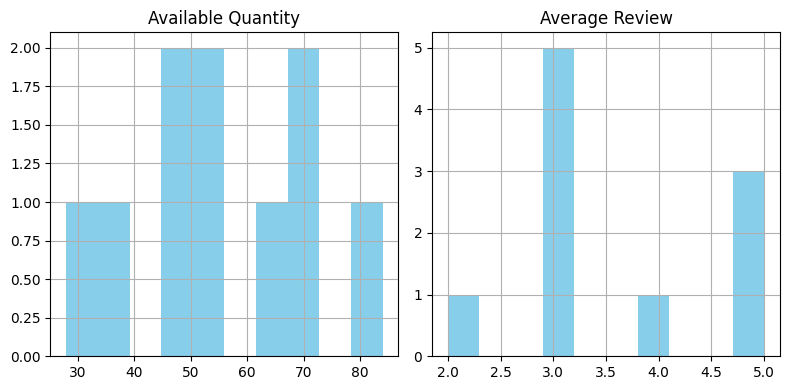

In [40]:
df.hist(figsize=(8, 4), bins=10, color='skyblue', grid=True)
plt.tight_layout()

# Plotting the data distribution: boxplots (numeric)

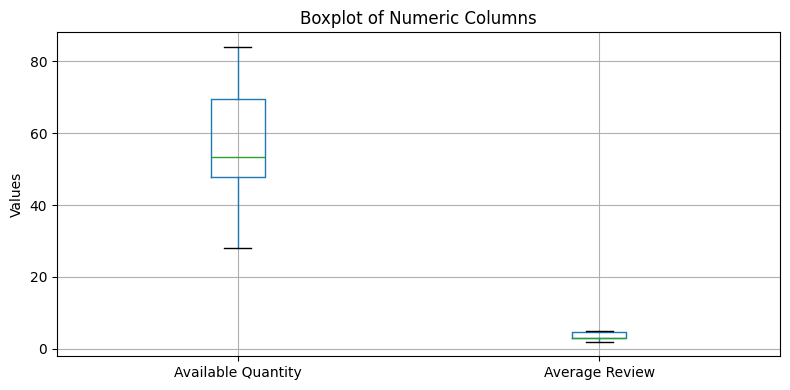

In [38]:
plt.figure(figsize=(8, 4))
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
numeric_cols.boxplot()
# Add a title and axis labels
plt.title('Boxplot of Numeric Columns')
plt.ylabel('Values')
plt.tight_layout()

# Plotting the data distribution: histogram (categorical)

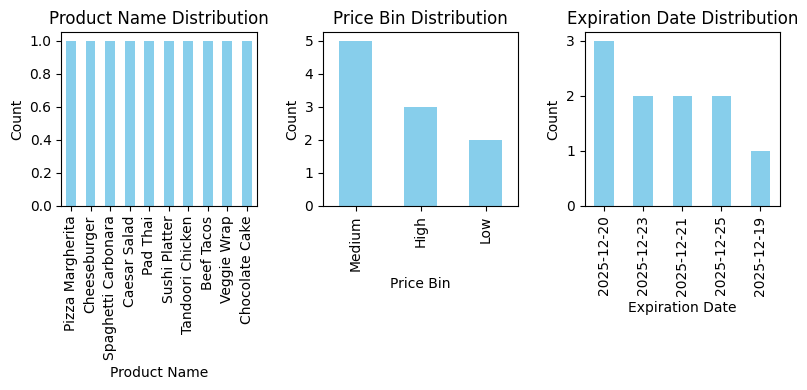

In [43]:
# Crea un sotto DataFrame con solo le colonne di tipo Object
categorical_cols = df.select_dtypes(include=['object'])
# Plot the distribution of each categorical column
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_cols.columns), figsize=(8, 4))
# In case there is only one categorical column, we make sure axes is treated as an array
if len(categorical_cols.columns) == 1: axes = [axes]
# Loop over each categorical column and plot a bar plot
for i, col in enumerate(categorical_cols.columns):
    categorical_cols[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
# Show the plots
plt.tight_layout()

# Exercises

These exercises will help you get familiar with basic Pandas operations and cover tasks you'll need when working with data.

When in troubles, check the documentation at [http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

1. Create a DataFrame with columns `Name`, `Age`, and `City` and data `[["Alice", 20, "New York"], ["Bob", 21, "Los Angeles"], ["Charlie", 19, "New York"]]`. Hint: Use `pd.DataFrame()`, see the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
2. Select and print the column `Name`. Hint: Use `df['column_name']`.
3. Filter the DataFrame to show rows where `Age` is greater/equal than 20.
4. Add a new column `Year` fill it 2024 - the `Age` of every person. Hint: Use `df['new_column'] = values`.
5. Group the DataFrame by `City` and calculate the average `Age` for each city. Hint: Use `df.groupby()`, see the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).
6. Sort the DataFrame by Age in descending order. Hint: Use `df.sort_values()`, see the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
7. Export the final DataFrame to a CSV file. Hint: Use `df.to_csv()`, see the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

In [44]:
# write your code here
import pandas as pd

df = pd.DataFrame([["Alice", 20, "New York"], ["Bob", 21, "Los Angeles"], ["Charlie", 19, "New York"]], columns=["Name", "Age", "City"]) #1
df['Name'] #2
df.loc[df['Age'] >= 20] #3
df['Year'] = 2024 - df['Age'] #4
df.groupby('City')['Age'].mean() #5
df.sort_values(by='Age', ascending=False) #6
df.to_csv('output.csv', index=False) #7
